In [1]:
import numpy
import math
import matplotlib.pyplot as plt

In [2]:
# Полиномы Лежандра (нумерация с 0, k - верхний индекс)
def L_n(n, x):
    if n == 0: return 1
    if n == 1: return x
    return (2 * n + 1) / (n + 1) * x * L_n(n - 1, x) - n / (n + 1) * L_n(n - 2, x)

In [3]:
# Функции w_i(x) (нумерация с 0)
def w_i(i, x):
    return L_n(i, x)

In [4]:
# Функция u(x)
def u(x):
    return 2 * math.sin(0.5) * math.cos(3.5 + x)


In [5]:
# Функция K(x, s)
def K(x, s):
    return math.cos(3 + x + s)

In [10]:
# Функция u(x) для z(s) = s^2+1
def u_2(x):
    return 2 * math.cos(4 + x) + math.sin(x + 3)


In [11]:
# Оператор A(w_i(x)) (нумерация с 0)
def A(i, x):
    X = []
    Y = []
    for k in range(101):
        X.append(0.01 * k)
        Y.append(K(x, X[k]) * w_i(i, X[k]))

    return numpy.trapz(Y, X)

In [12]:
# Вычисление B
def comp_B(n):
    B = numpy.array([[0.0 for i in range(n)] for j in range(n)])

    for i in range(n):
        for j in range(n):
            X = []
            Y = []
            for k in range(101):
                X.append(0.01 * k)
                Y.append(A(j, X[k]) * w_i(i, X[k]))
            B[i][j] = numpy.trapz(Y, X)

    return numpy.array(B)


In [13]:
# Вычисление U ( = u(s_j)) для z(x) = x^2 + 1
def comp_U_2(n):
    U = []

    for i in range(n):
        X = []
        Y = []
        for k in range(101):
            X.append(0.01 * k)
            Y.append(u_2(X[k]) * w_i(i, X[k]))
        U.append(numpy.trapz(Y, X))

    return numpy.array(U)

In [14]:
# Вычисление C ( = c_j) для z(x) = x^2 + 1 
def comp_C_2(n, alpha):
    U = comp_U_2(n)
    B = comp_B(n)
    B_H = B.transpose()
    A = B_H.dot(B) + alpha * numpy.eye(n)
    b = B_H.dot(U)
    return numpy.linalg.solve(A, b)

In [15]:
# Вывод значений для Галеркина 
def solut(n, alpha):
    c_j = comp_C_2(n, alpha)
    y_n_x = []
    for j in range(6):
        ans = 0
        for i in range(n):
            ans += c_j[i] * w_i(i, j * 0.2)
        y_n_x.append(ans)
    return y_n_x

Az(x) = int(z(s) * cos(3 + x + s)ds, 0, 1) = 2 * sin(1/2) * cos(7/2 + x)


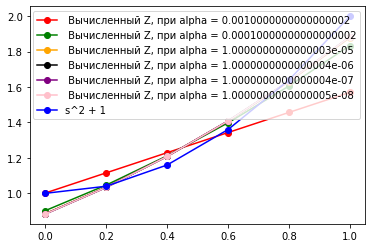

In [17]:
    print('Az(x) = int(z(s) * cos(3 + x + s)ds, 0, 1) = 2 * sin(1/2) * cos(7/2 + x)')

    color = ['red', 'green', 'orange', 'black', 'purple', 'pink']
    for i in range(3, 9):
        Z_n = solut(3, 0.1 ** i)
        X = [0.2 * i for i in range(6)]
        Y = [(0.2 * i) ** 2 + 1 for i in range(6)]
        plt.plot(X, Z_n, color = color[i - 3], marker = 'o', linestyle = '-', markerfacecolor = color[i - 3], label = ' Вычисленный Z, при alpha = ' + str(0.1 ** i))
        
    plt.plot(X, Y, color = 'blue', marker = 'o', linestyle = '-', markerfacecolor = 'blue', label = 's^2 + 1') 
    plt.legend(loc = 'best')
    plt.show()


Имеем уравнение с заданным ядром.

1)Вычисляем u(x) при z(s)=1 и z(s)=s^2+1

2)Выбираем многочлены Лежандра, как координатную систему и ищем приближенное решение в виде лин. комбинации

3)Условие равенства моментов позволяет найти неизвестные коэффициенты, после чего получаем СЛАУ

4)СЛАУ перепишем в матричном виде. Она плохо обусловлена, значит, решать ее будем методом регуляризации: ищем решение системы (B*B+alpha*E)*C=B*U с положительным alpha

Вывод: метод Галеркина работает точнее, но медленнее из-за интегрирования B